<a href="https://colab.research.google.com/github/felipefranca/python-data-visualization-imdb-dataset/blob/main/Trabalho_Final_Visualiza%C3%A7%C3%A3o_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings;warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data = pd.read_csv('data/title_basics.csv')
data = data[['titleType','primaryTitle','isAdult','startYear','endYear','runtimeMinutes','genres']]
data

,titleType,primaryTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,short,Carmencita,0.0,1894,\N,1,"Documentary,Short"
1,short,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short"
2,short,Pauvre Pierrot,0.0,1892,\N,4,"Animation,Comedy,Romance"
3,short,Un bon bock,0.0,1892,\N,12,"Animation,Short"
4,short,Blacksmith Scene,0.0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...
311385,movie,The Cheaters,0.0,2001,\N,80,"Crime,Drama"
311386,tvMovie,Cheer for Charlie: Charlie Goes Latin,0.0,2002,\N,60,Documentary
311387,movie,Mi-ae,0.0,1970,\N,\N,\N
311388,short,Children of Chance,0.0,1915,\N,10,Short


In [31]:
tmp = data[data['startYear']!='\\N']
tmp['startYear'] = tmp['startYear'].dropna(inplace=True)

tmp

,titleType,primaryTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,short,Carmencita,0.0,None,\N,1,"Documentary,Short"
1,short,Le clown et ses chiens,0.0,None,\N,5,"Animation,Short"
2,short,Pauvre Pierrot,0.0,None,\N,4,"Animation,Comedy,Romance"
3,short,Un bon bock,0.0,None,\N,12,"Animation,Short"
4,short,Blacksmith Scene,0.0,None,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...
311385,movie,The Cheaters,0.0,None,\N,80,"Crime,Drama"
311386,tvMovie,Cheer for Charlie: Charlie Goes Latin,0.0,None,\N,60,Documentary
311387,movie,Mi-ae,0.0,None,\N,\N,\N
311388,short,Children of Chance,0.0,None,\N,10,Short


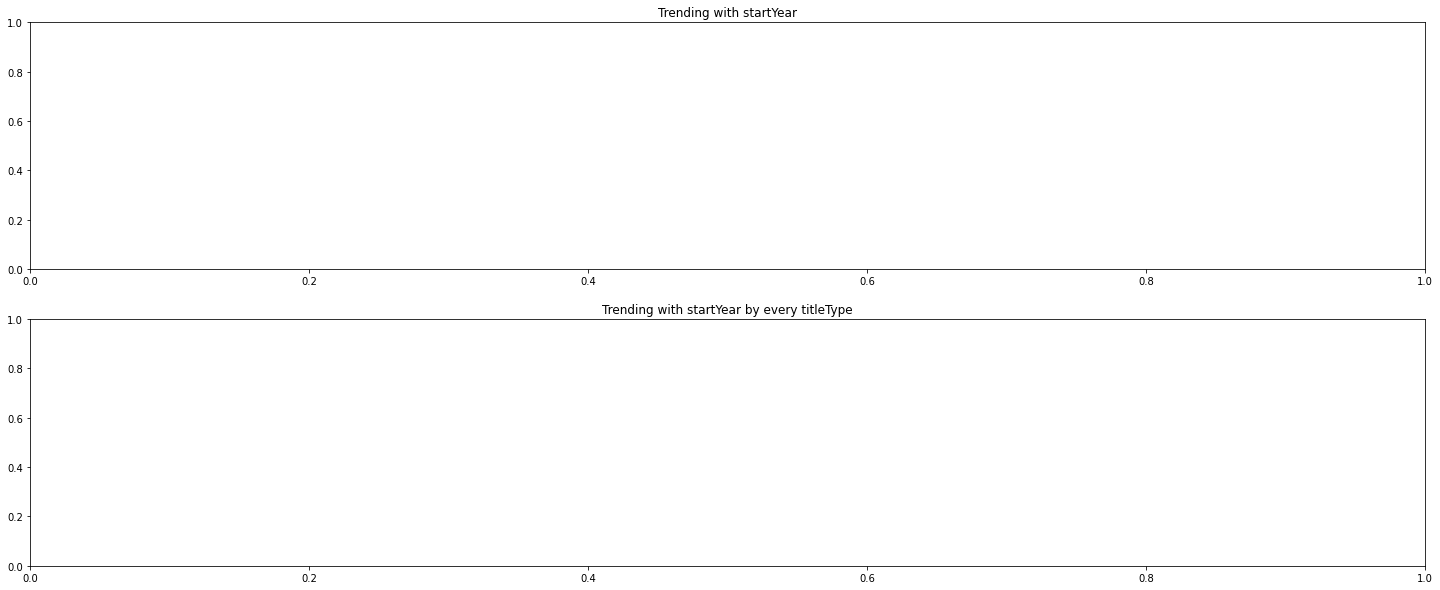

In [30]:

tmp1 = tmp[['primaryTitle','startYear']].groupby('startYear').count().reset_index().sort_values('startYear')
tmp2 = tmp[['primaryTitle','startYear','titleType']].groupby(['startYear','titleType']).count().reset_index().sort_values('startYear')

fig,ax_arr = plt.subplots(2,1,figsize=(25,10))
sns.lineplot(data=tmp1, x='startYear', y='primaryTitle', ax=ax_arr[0])
ax_arr[0].set_title('Trending with startYear')
sns.lineplot(data=tmp2, x='startYear', y='primaryTitle', hue='titleType', ax=ax_arr[1])
ax_arr[1].set_title('Trending with startYear by every titleType')
plt.show()